# Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

# Reading the Dataset 

In [2]:
df=pd.read_csv('Sales_Transactions_Dataset_Weekly.csv')
df.head()

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


# Considering 50 products alone

In [3]:
products = df['Product_Code'].unique()[:50]
data = df[df['Product_Code'].isin(products)].iloc[:, :53]
data.tail()

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
45,P46,27,46,31,38,40,40,53,43,45,...,33,46,30,29,31,32,21,34,31,14
46,P47,40,42,27,28,33,29,33,58,37,...,38,39,33,27,33,33,36,30,34,20
47,P48,29,51,40,33,43,28,29,41,35,...,36,22,38,34,33,44,23,31,35,27
48,P49,37,28,42,38,37,35,42,36,30,...,25,49,36,27,33,41,37,22,33,23
49,P50,12,3,15,8,12,7,9,10,12,...,6,12,12,10,10,8,5,8,9,9


# For easier analysis

In [4]:
melt = data.melt(id_vars='Product_Code', var_name='Week', value_name='Sales')
melt.head()

,Product_Code,Week,Sales
0,P1,W0,11
1,P2,W0,7
2,P3,W0,7
3,P4,W0,12
4,P5,W0,8


In [5]:
melt.tail()

,Product_Code,Week,Sales
2595,P46,W51,14
2596,P47,W51,20
2597,P48,W51,27
2598,P49,W51,23
2599,P50,W51,9


In [6]:
melt['Product_Code'] = melt['Product_Code'].str.extract('(\d+)', expand=False).astype(int)
melt['Week'] = melt['Week'].str.extract('(\d+)', expand=False).astype(int)

melt = melt.sort_values(['Week', 'Product_Code'])
melt.head()

,Product_Code,Week,Sales
0,1,0,11
1,2,0,7
2,3,0,7
3,4,0,12
4,5,0,8


# Splitting

In [7]:
split_point = 40
melt_train = melt[melt['Week'] < split_point].copy()
melt_valid = melt[melt['Week'] >= split_point].copy()
melt_train.tail()

,Product_Code,Week,Sales
1995,46,39,30
1996,47,39,29
1997,48,39,38
1998,49,39,37
1999,50,39,9


In [8]:
melt_valid.head()

,Product_Code,Week,Sales
2000,1,40,7
2001,2,40,2
2002,3,40,3
2003,4,40,12
2004,5,40,5


# Setting up Target

In [9]:
melt_train['sales_next_week'] = melt_train.groupby("Product_Code")['Sales'].shift(-1)
melt_valid['sales_next_week'] = melt_valid.groupby("Product_Code")['Sales'].shift(-1)

In [10]:
melt_train['sales_next_next_week'] = melt_train.groupby("Product_Code")['Sales'].shift(-2)
melt_valid['sales_next_next_week'] = melt_valid.groupby("Product_Code")['Sales'].shift(-2)

In [11]:
melt_train[melt_train['Product_Code'] == 1].head()

,Product_Code,Week,Sales,sales_next_week,sales_next_next_week
0,1,0,11,12.0,10.0
50,1,1,12,10.0,8.0
100,1,2,10,8.0,13.0
150,1,3,8,13.0,12.0
200,1,4,13,12.0,14.0


In [12]:
melt_train[melt_train['Product_Code'] == 1].tail()

,Product_Code,Week,Sales,sales_next_week,sales_next_next_week
1750,1,35,14,10.0,9.0
1800,1,36,10,9.0,12.0
1850,1,37,9,12.0,17.0
1900,1,38,12,17.0,NaN
1950,1,39,17,NaN,NaN


In [13]:
melt_valid[melt_valid['Product_Code'] == 1].head()

,Product_Code,Week,Sales,sales_next_week,sales_next_next_week
2000,1,40,7,11.0,4.0
2050,1,41,11,4.0,7.0
2100,1,42,4,7.0,8.0
2150,1,43,7,8.0,10.0
2200,1,44,8,10.0,12.0


In [14]:
melt_valid[melt_valid['Product_Code'] == 1].tail()

,Product_Code,Week,Sales,sales_next_week,sales_next_next_week
2350,1,47,3,7.0,6.0
2400,1,48,7,6.0,5.0
2450,1,49,6,5.0,10.0
2500,1,50,5,10.0,NaN
2550,1,51,10,NaN,NaN


# Dropping NaN

In [15]:
melt_train = melt_train.dropna(subset=['sales_next_week','sales_next_next_week'])

In [16]:
melt_train[melt_train['Product_Code'] == 1].tail()

,Product_Code,Week,Sales,sales_next_week,sales_next_next_week
1650,1,33,6,5.0,14.0
1700,1,34,5,14.0,10.0
1750,1,35,14,10.0,9.0
1800,1,36,10,9.0,12.0
1850,1,37,9,12.0,17.0


In [17]:
melt_valid[melt_valid['Product_Code'] == 1].tail()

,Product_Code,Week,Sales,sales_next_week,sales_next_next_week
2350,1,47,3,7.0,6.0
2400,1,48,7,6.0,5.0
2450,1,49,6,5.0,10.0
2500,1,50,5,10.0,NaN
2550,1,51,10,NaN,NaN


# Creating features
### 1.Lag

In [18]:
melt_train["lag_sales_1"] = melt_train.groupby("Product_Code")['Sales'].shift(1)

In [1]:
melt_train[melt_train['Product_Code'] == 1].head()

NameError: name 'melt_train' is not defined

In [20]:
melt_valid["lag_sales_1"] = melt_valid.groupby("Product_Code")['Sales'].shift(1)

### 2.Difference

In [21]:
melt_train["diff_sales_1"] = melt_train.groupby("Product_Code")['Sales'].diff(1)

In [22]:
melt_train[melt_train['Product_Code'] == 3].head()

,Product_Code,Week,Sales,sales_next_week,sales_next_next_week,lag_sales_1,diff_sales_1
2,3,0,7,11.0,8.0,NaN,NaN
52,3,1,11,8.0,9.0,7.0,4.0
102,3,2,8,9.0,10.0,11.0,-3.0
152,3,3,9,10.0,8.0,8.0,1.0
202,3,4,10,8.0,7.0,9.0,1.0


In [23]:
melt_valid["diff_sales_1"] = melt_valid.groupby("Product_Code")['Sales'].diff(1)

### 3.Moving avg

In [24]:
melt_train.groupby("Product_Code")['Sales'].rolling(4).mean()

Product_Code      
1             0         NaN
              50        NaN
              100       NaN
              150     10.25
              200     10.75
                      ...  
50            1699     8.50
              1749     8.00
              1799     6.50
              1849     5.75
              1899     7.00
Name: Sales, Length: 1900, dtype: float64

In [25]:
melt_train.groupby("Product_Code")['Sales'].rolling(4).mean().reset_index(level=0, drop=True)

0         NaN
50        NaN
100       NaN
150     10.25
200     10.75
        ...  
1699     8.50
1749     8.00
1799     6.50
1849     5.75
1899     7.00
Name: Sales, Length: 1900, dtype: float64

In [26]:
melt_train["mean_sales_4"] = melt_train.groupby("Product_Code")['Sales'].rolling(4).mean().reset_index(level=0, drop=True)

In [27]:
melt_train[melt_train['Product_Code'] == 1].head()

,Product_Code,Week,Sales,sales_next_week,sales_next_next_week,lag_sales_1,diff_sales_1,mean_sales_4
0,1,0,11,12.0,10.0,NaN,NaN,NaN
50,1,1,12,10.0,8.0,11.0,1.0,NaN
100,1,2,10,8.0,13.0,12.0,-2.0,NaN
150,1,3,8,13.0,12.0,10.0,-2.0,10.25
200,1,4,13,12.0,14.0,8.0,5.0,10.75


In [28]:
melt_valid["mean_sales_4"] = melt_valid.groupby("Product_Code")['Sales'].rolling(4).mean().reset_index(level=0, drop=True)

### 4 Date components (seasonality) - not available in this dataset
#### Day of week
#### Day of year
#### Month
#### Day of month 

# Evaluation

In [29]:
def mape(y_true, y_pred):
    ape = np.abs((y_true - y_pred) / y_true)
    #ape[~np.isfinite(ape)] = 0. # VERY questionable
    ape[~np.isfinite(ape)] = 1. # pessimist estimate
    return np.mean(ape)

def wmape(y_true, y_pred):
    return np.sum(np.abs(y_true - y_pred)) / np.sum(np.abs(y_true))

In [30]:
y_pred = melt_train['Sales']
y_true = melt_train['sales_next_week']

In [31]:
mape(y_true, y_pred)

0.3623510374462698

In [32]:
wmape(y_true, y_pred)

0.24885072223648286

# Training 

In [33]:
features = ['Sales', 'lag_sales_1', 'diff_sales_1', 'mean_sales_4']

In [34]:
imputer = SimpleImputer()
Xtr = imputer.fit_transform(melt_train[features])
ytr = melt_train[['sales_next_week', 'sales_next_next_week']]

mdl = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=6)
mdl.fit(Xtr, ytr)

RandomForestRegressor(n_jobs=6, random_state=0)

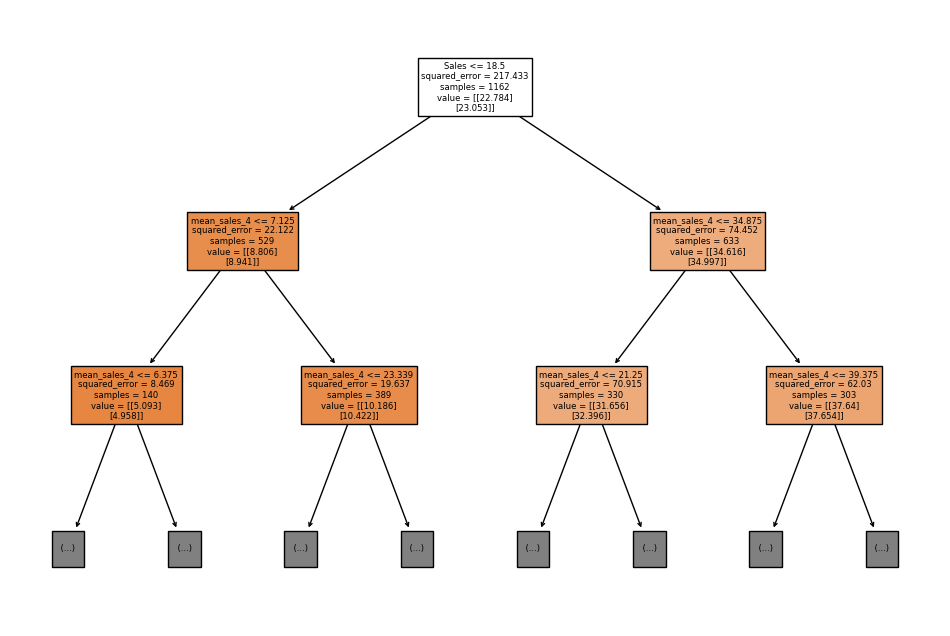

In [35]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Select one of the estimators (decision trees) from your random forest
estimator = mdl.estimators_[1]

# Plot only the first level of the decision tree
plt.figure(figsize=(12, 8))
plot_tree(estimator, feature_names=features, filled=True, max_depth=2)
plt.show()

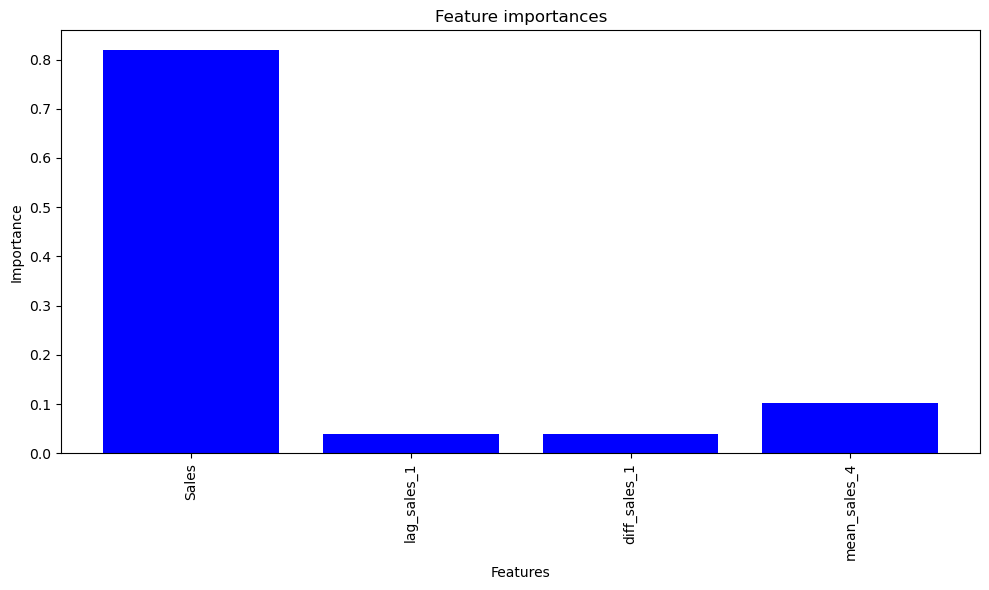

In [36]:
import matplotlib.pyplot as plt

# Get feature importances
importances = mdl.feature_importances_
features = ['Sales', 'lag_sales_1', 'diff_sales_1', 'mean_sales_4']

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(len(importances)), importances, color="b", align="center")
plt.xticks(range(len(importances)), features, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()


In [37]:
melt_valid.tail()

,Product_Code,Week,Sales,sales_next_week,sales_next_next_week,lag_sales_1,diff_sales_1,mean_sales_4
2595,46,51,14,NaN,NaN,31.0,-17.0,25.00
2596,47,51,20,NaN,NaN,34.0,-14.0,30.00
2597,48,51,27,NaN,NaN,35.0,-8.0,29.00
2598,49,51,23,NaN,NaN,33.0,-10.0,28.75
2599,50,51,9,NaN,NaN,9.0,0.0,7.75


In [38]:
new_examples = melt_valid[melt_valid['Week'] == 51].copy()
new_examples

,Product_Code,Week,Sales,sales_next_week,sales_next_next_week,lag_sales_1,diff_sales_1,mean_sales_4
2550,1,51,10,NaN,NaN,5.0,5.0,7.00
2551,2,51,0,NaN,NaN,6.0,-6.0,3.00
2552,3,51,7,NaN,NaN,8.0,-1.0,9.25
2553,4,51,8,NaN,NaN,7.0,1.0,9.25
2554,5,51,9,NaN,NaN,8.0,1.0,8.25
2555,6,51,6,NaN,NaN,10.0,-4.0,5.50
2556,7,51,1,NaN,NaN,2.0,-1.0,2.25
2557,8,51,9,NaN,NaN,9.0,0.0,7.25
2558,9,51,13,NaN,NaN,7.0,6.0,10.50
2559,10,51,20,NaN,NaN,18.0,2.0,19.75


In [39]:
p = mdl.predict(new_examples[features])
p

C:\Users\Welcome\anaconda3\New folder\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([[ 7.455     ,  9.07233333],
       [ 4.94066667,  3.95233333],
       [ 9.529     ,  9.18166667],
       [ 9.6       ,  8.07666667],
       [ 8.67771429,  8.50719048],
       [ 5.50666667,  7.57333333],
       [ 5.51965476,  3.51959524],
       [11.2325    ,  9.3875    ],
       [ 9.67183333,  9.73766667],
       [21.2       , 23.47      ],
       [16.69      , 12.09      ],
       [ 4.39833333,  6.62      ],
       [ 9.52      ,  8.29      ],
       [10.23      , 12.75      ],
       [29.29      , 31.78      ],
       [27.68      , 24.43      ],
       [30.42      , 31.2       ],
       [30.42      , 30.82      ],
       [33.27666667, 32.68833333],
       [10.40833333, 10.03583333],
       [ 9.65333333,  8.87666667],
       [ 8.81      ,  8.34      ],
       [ 4.46533333,  2.4665    ],
       [28.63      , 29.56      ],
       [35.88      , 30.34      ],
       [17.89      , 11.19      ],
       [32.4925    , 33.085     ],
       [28.82      , 32.22      ],
       [11.35      ,

In [40]:
new_examples['p_sales_next_week'] = p[:, 0]
new_examples['p_sales_next_next_week'] = p[:, 1]

In [41]:
new_examples.head()

,Product_Code,Week,Sales,sales_next_week,sales_next_next_week,lag_sales_1,diff_sales_1,mean_sales_4,p_sales_next_week,p_sales_next_next_week
2550,1,51,10,NaN,NaN,5.0,5.0,7.00,7.455000,9.072333
2551,2,51,0,NaN,NaN,6.0,-6.0,3.00,4.940667,3.952333
2552,3,51,7,NaN,NaN,8.0,-1.0,9.25,9.529000,9.181667
2553,4,51,8,NaN,NaN,7.0,1.0,9.25,9.600000,8.076667
2554,5,51,9,NaN,NaN,8.0,1.0,8.25,8.677714,8.507190


## Visualizing sales of 52nd and 53rd week for 50 products 

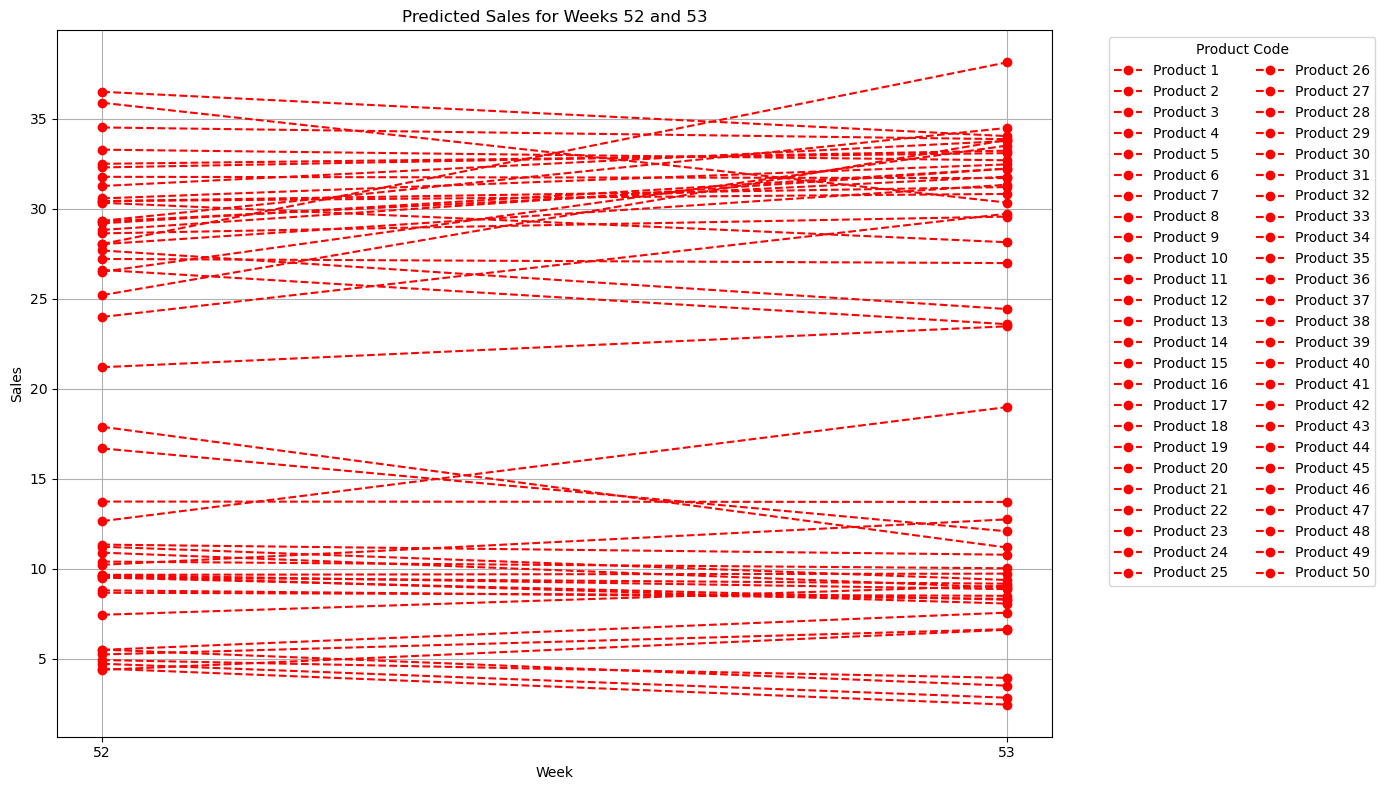

In [42]:
import matplotlib.pyplot as plt
import pandas as pd



# Adding week identifiers for plotting purposes
new_examples['Week_52'] = 52
new_examples['Week_53'] = 53

# Creating a new DataFrame for easy plotting
plot_data = pd.DataFrame({
    'Product_Code': pd.concat([new_examples['Product_Code'], new_examples['Product_Code']]),
    'Week': pd.concat([new_examples['Week_52'], new_examples['Week_53']]),
    'Sales': pd.concat([new_examples['p_sales_next_week'], new_examples['p_sales_next_next_week']])
})

plt.figure(figsize=(14, 8))
for product in plot_data['Product_Code'].unique():
    product_data = plot_data[plot_data['Product_Code'] == product]
    plt.plot('Week', 'Sales', data=product_data, linestyle='--', color='red', marker='o', label=f'Product {product}')

plt.xticks([52, 53])
plt.title('Predicted Sales for Weeks 52 and 53')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.legend(title='Product Code', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()


## Visualizing sales of 52nd and 53rd week for 10 products 

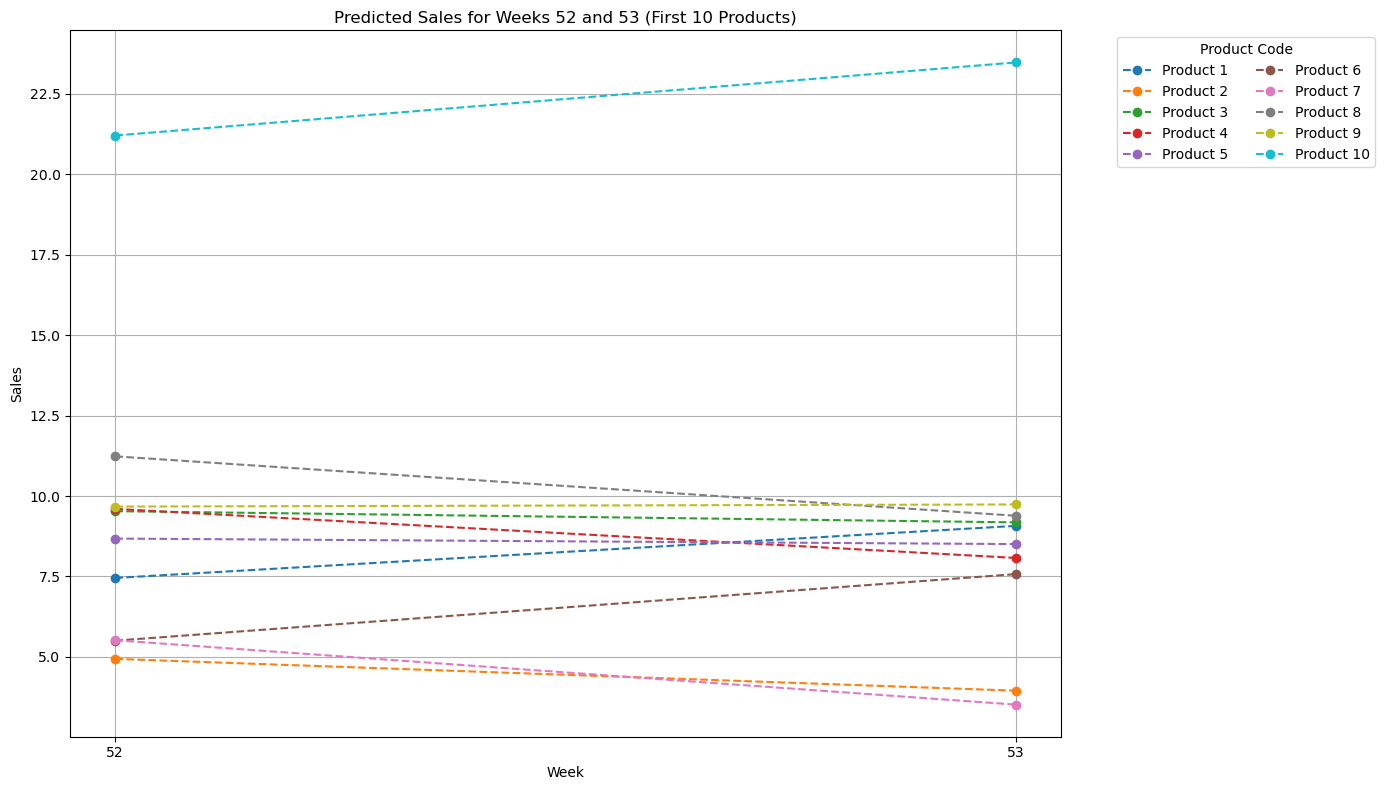

In [43]:
import matplotlib.pyplot as plt
import pandas as pd


# Adding week identifiers for plotting purposes
new_examples['Week_52'] = 52
new_examples['Week_53'] = 53

# Creating a new DataFrame for easy plotting
plot_data = pd.DataFrame({
    'Product_Code': pd.concat([new_examples['Product_Code'], new_examples['Product_Code']]),
    'Week': pd.concat([new_examples['Week_52'], new_examples['Week_53']]),
    'Sales': pd.concat([new_examples['p_sales_next_week'], new_examples['p_sales_next_next_week']])
})

# Filter plot_data to include only the first 10 products
plot_data = plot_data[plot_data['Product_Code'].isin(range(1, 11))]  # Adjust range as necessary depending on your product codes

plt.figure(figsize=(14, 8))
for product in plot_data['Product_Code'].unique():
    product_data = plot_data[plot_data['Product_Code'] == product]
    plt.plot('Week', 'Sales', data=product_data, linestyle='--', marker='o', label=f'Product {product}')

plt.xticks([52, 53])
plt.title('Predicted Sales for Weeks 52 and 53 (First 10 Products)')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.legend(title='Product Code', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()


# Saving the model 

In [44]:
from joblib import dump, load
dump(mdl, 'model.joblib')

['model.joblib']

In [45]:
test_model = load('model.joblib')

In [46]:
input_data=np.array([[10,5,5,7]])
testing=test_model.predict(input_data)
rounded_predictions = np.round(testing).astype(int)
rounded_predictions

array([[7, 9]])

In [49]:
new_example1 = melt_valid[melt_valid['Week'] == 43].copy()
new_example1

,Product_Code,Week,Sales,sales_next_week,sales_next_next_week,lag_sales_1,diff_sales_1,mean_sales_4
2150,1,43,7,8.0,10.0,4.0,3.0,7.25
2151,2,43,4,5.0,1.0,2.0,2.0,3.25
2152,3,43,14,5.0,5.0,6.0,8.0,7.00
2153,4,43,10,3.0,4.0,9.0,1.0,9.25
2154,5,43,11,7.0,12.0,7.0,4.0,7.75
2155,6,43,2,4.0,3.0,4.0,-2.0,3.75
2156,7,43,3,3.0,6.0,2.0,1.0,4.50
2157,8,43,14,4.0,8.0,10.0,4.0,9.00
2158,9,43,5,13.0,3.0,11.0,-6.0,8.25
2159,10,43,17,11.0,24.0,14.0,3.0,15.25
